In [142]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np


#since alt can only handle 5000 items by default setting( we got the error message below) 
#we applied the codes so that it can handle larger dataset
#MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). 
# For information on how to plot larger datasets in Altair, see the documentation"
import altair as alt
alt.data_transformers.enable('data_server')
#pip install altair_data_server

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import kstest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.metrics import max_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.formula.api import logit

from mlxtend.plotting import plot_decision_regions

from statsmodels.formula.api import logit
from IPython.display import display

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [140]:
!pip install mlxtend


# The objectives of this project is to determine the variables leading to fraudulent transactions in auto claims

In [74]:
#Importing the dataset
data=pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\conestogac\fundamentals_of_programming\project\fraud_oracle.csv")
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


# step:1 Data Cleaning 

The first step is to view a breakdown of the variables. 
This dataset has 33 variables, made up of 24 'object' variables and 9 'integer' variables. 
In cleaning this data, we need to ensure that there are no null-values or duplicates,
and remove needless variables from the equation.

In [75]:
#using  the info method on data to see info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [76]:
#removing duplicates and unnecessary variables
data.drop_duplicates()
data.drop(['PolicyNumber','RepNumber'],inplace=True,axis=1)


In [77]:
#checking if there are any null values
data.isnull().sum()
#luckly We do not have any missing values

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

# Step 2: Exploratory Data Analysis

In [78]:

# the head method on data to print the first several rows of the data
data.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [79]:
# Display all column names /variable names
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

In [80]:
# Amongst the column list above most of the columns are categorical, apart from deductible. 
#Since we are trying to model the fraudulent transaction the " FraudFound_P" is our dependent variable is binary

In [81]:
#Checking the numerical features
data.describe().T
#Amongst the numeric features week of month, week of month claimed, fraud found, driver rating seems categorical

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Age,15420.0,39.855707,13.492377,0.0,31.0,38.0,48.0,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.0,0.0,0.0,1.0
Deductible,15420.0,407.704280,43.950998,300.0,400.0,400.0,400.0,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.0,2.0,3.0,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.0,1995.0,1996.0,1996.0


In [82]:
# To show unique values in each column/variable
for column in data:
    print(column)
    print(sorted(data[column].unique()),"\n")

Month
['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonth
[1, 2, 3, 4, 5] 

DayOfWeek
['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

Make
['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW'] 

AccidentArea
['Rural', 'Urban'] 

DayOfWeekClaimed
['0', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'] 

MonthClaimed
['0', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'] 

WeekOfMonthClaimed
[1, 2, 3, 4, 5] 

Sex
['Female', 'Male'] 

MaritalStatus
['Divorced', 'Married', 'Single', 'Widow'] 

Age
[0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 7

creating separate datasets for fraud and no-fraud, 
so that we can more easily measure the correlation between other variables and fraud.


In [83]:
#filtering and storing the  legitimate and fruadulent claims
nonfraud=data.loc[data['FraudFound_P']==0]
fraud=data.loc[data['FraudFound_P']==1]



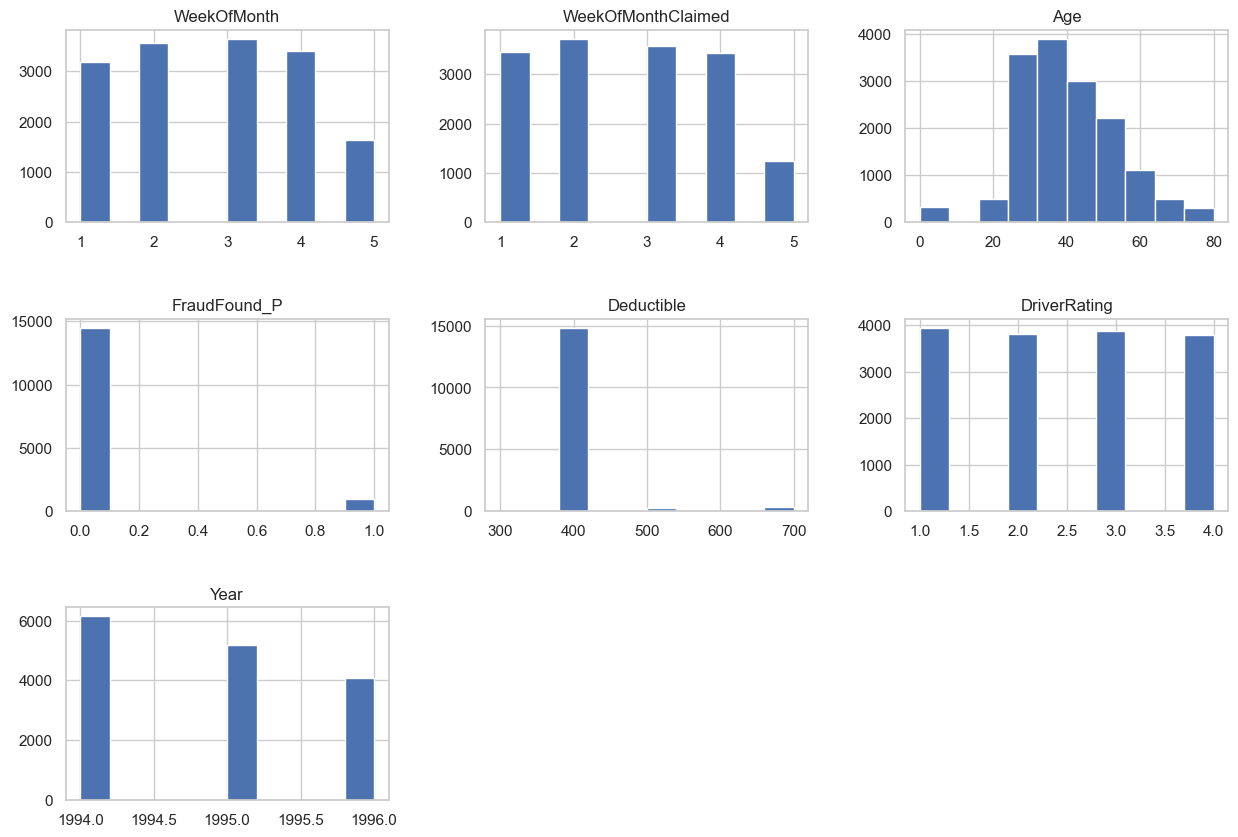

In [84]:
#Checking histograms of numerical features 
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);


1. Most of the deductibles are in 3 categories. Most commonly involved in claims is 400
2. Driver Rating are somewhat equally distributed
3. Fraudulent claims have very small proportion
4. Only 3 years of cars showing in the data and year 1994 ( older cars) have more involvement in accidents

# Checking the distribution of Categorical Columns

#### 1.MONTH

Jan    0.091505
May    0.088651
Mar    0.088197
Jun    0.085668
Oct    0.084630
Dec    0.083333
Apr    0.083009
Feb    0.082101
Jul    0.081518
Sep    0.080415
Nov    0.077886
Aug    0.073087
Name: Month, dtype: float64


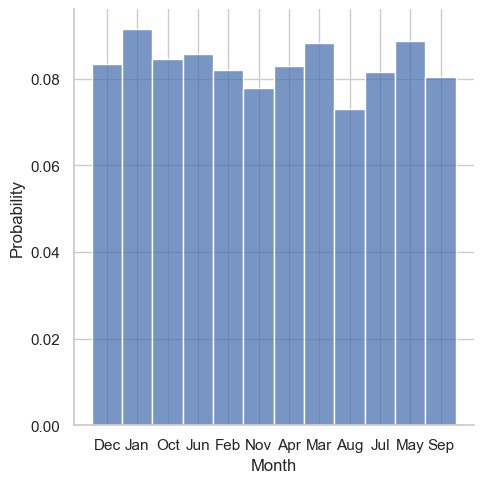

In [85]:
item1 = data['Month'].value_counts(normalize=True)
print(item1)
#plotting using seaborn
sns.displot(x ='Month',stat="probability",palette = 'hls',data = data)
plt.tight_layout()
plt.show()

#months of March and May has relatively higher probablity

Month
Apr    0.062500
Aug    0.074534
Dec    0.048249
Feb    0.064771
Jan    0.061658
Jul    0.047733
Jun    0.060560
Mar    0.075000
May    0.068764
Nov    0.038301
Oct    0.053640
Sep    0.061290
Name: FraudFound_P, dtype: float64
Month
Apr    0.242156
Aug    0.262755
Dec    0.214375
Feb    0.246218
Jan    0.240619
Jul    0.213285
Jun    0.238612
Mar    0.263488
May    0.253145
Nov    0.192003
Oct    0.225392
Sep    0.239959
Name: FraudFound_P, dtype: float64


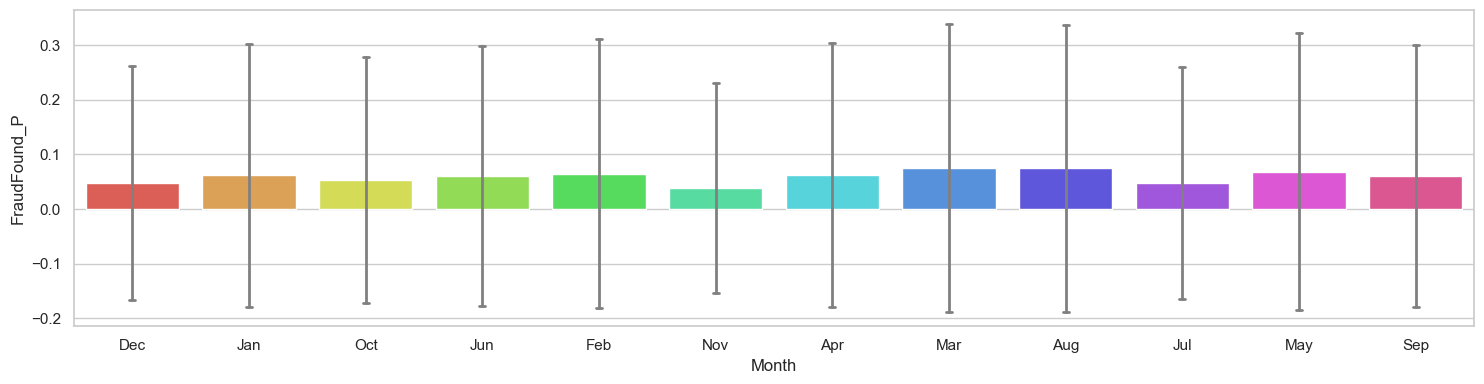

In [86]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Month', y = 'FraudFound_P', data = data,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(data.groupby(['Month']).mean()['FraudFound_P'])
print(data.groupby(['Month']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()


### 2. the make of the vehicle

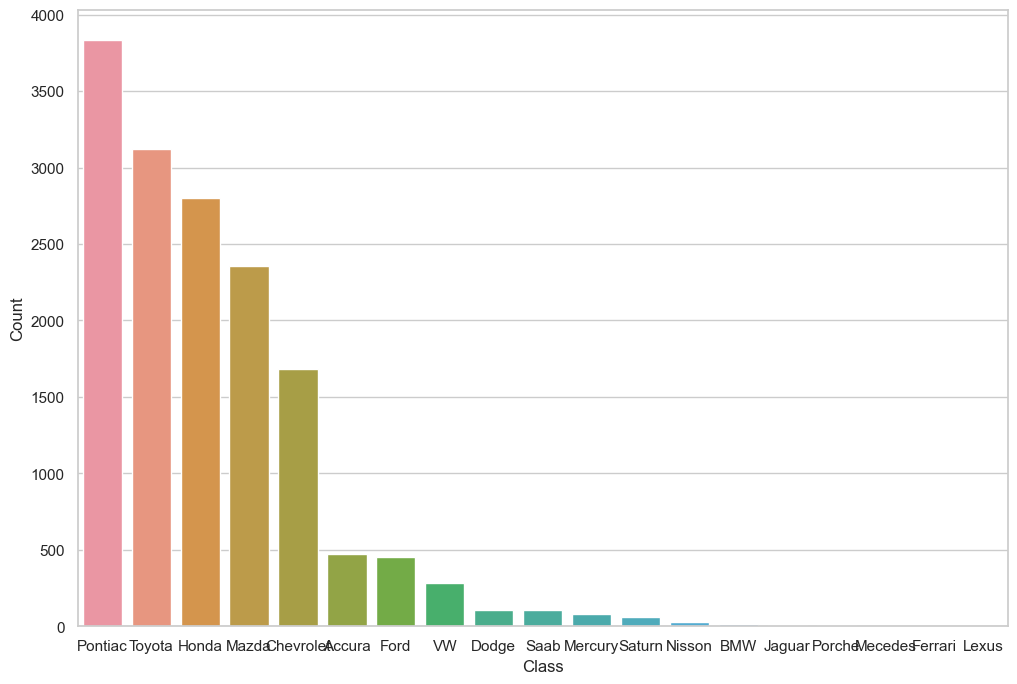

In [87]:
plt.figure(figsize=(12, 8))
ax3 = sns.countplot(x="Make",order=data['Make'].value_counts().index ,data=data)
ax3.set(xlabel='Class', ylabel='Count')


plt.show()

Pontiac, Toyota, Honda, Mazda and Chevrolet are the top 5 makes involved in claims

#### 3. the distribution of total claims columns

In [88]:
data['FraudFound_P'].value_counts()


0    14497
1      923
Name: FraudFound_P, dtype: int64

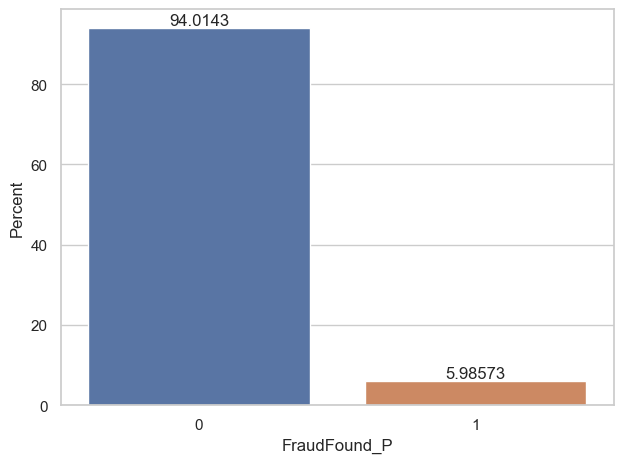

In [89]:
# PERCENTAGE BAR PLOT  (fruadulent and legitimate claims)

ax = sns.barplot(x='FraudFound_P', y='FraudFound_P', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()
# For the FraudFound_P column, 0 means fraud was not found, 
#and 1 means fraud was found.

Close to 94% (14497 claims) tranaction are fair and 6%(923 claims) are fraudulent.

#### 4. contribution of sex type on fruadulent and legitimate claims

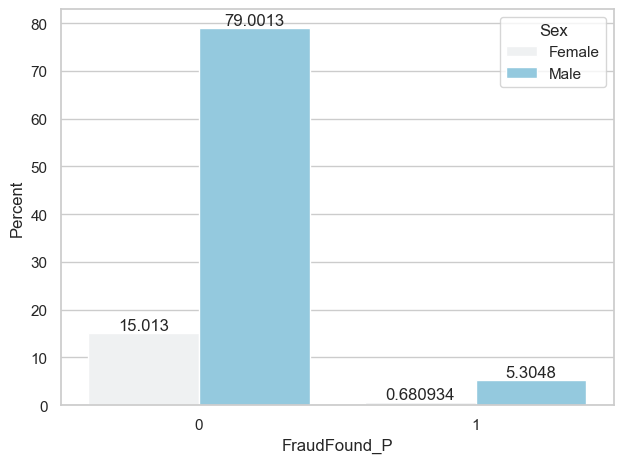

In [90]:
# for all claims
sns.set(style="whitegrid")
ax=sns.barplot(data=data,x='FraudFound_P', y='FraudFound_P',hue='Sex', 
               color="skyblue",estimator=lambda x: len(x) / len(data) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

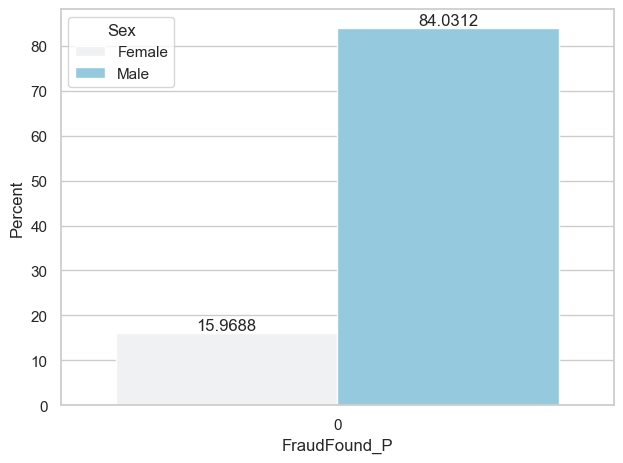

In [91]:
# for legitimate claims
sns.set(style="whitegrid")  
ax=sns.barplot(data=nonfraud,x='FraudFound_P',y='FraudFound_P',hue='Sex',
               color="skyblue",estimator=lambda x: len(x) / len(nonfraud) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
    plt.tight_layout()
plt.show()

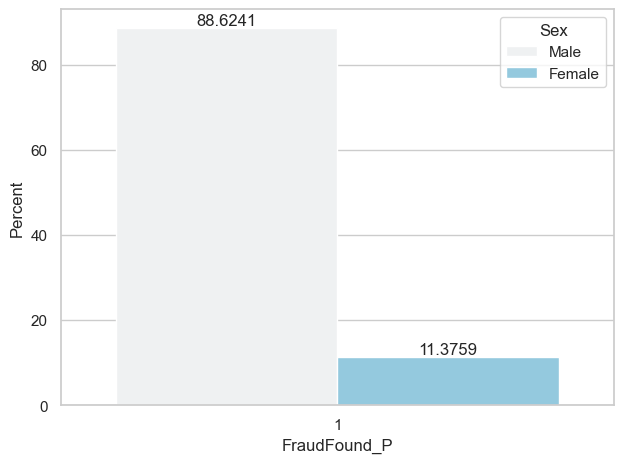

In [92]:
# for fruadulent claims
sns.set(style="whitegrid") 
ax=sns.barplot(data=fraud,x='FraudFound_P',y='FraudFound_P',hue='Sex', 
               color="skyblue",estimator=lambda x: len(x) / len(fraud) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

Amongst the total claims males contribute 84.03% for non-fraudulent transactions 
but contribute 88.62% of fraudulent transactions.
Males are more likely to submit fraudulent claims")

#### 5.fraudulent transactions by age 

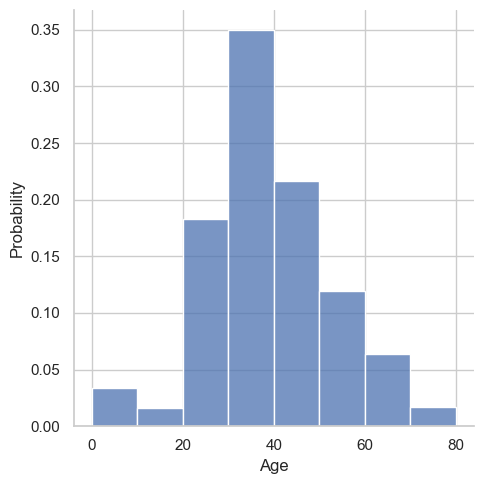

In [93]:
ax=sns.displot(x ='Age',stat="probability",bins=8,data = fraud)
# Show the plot
plt.show()

There are several readings for age=0, which canot be driver .At this point we are not sure what that age column is. 
Interesting observation is the distribution of age groups and it seems like most 
case are clustered between age 20 and 60 with significant increase in fraudulent activities for age group 30 to40

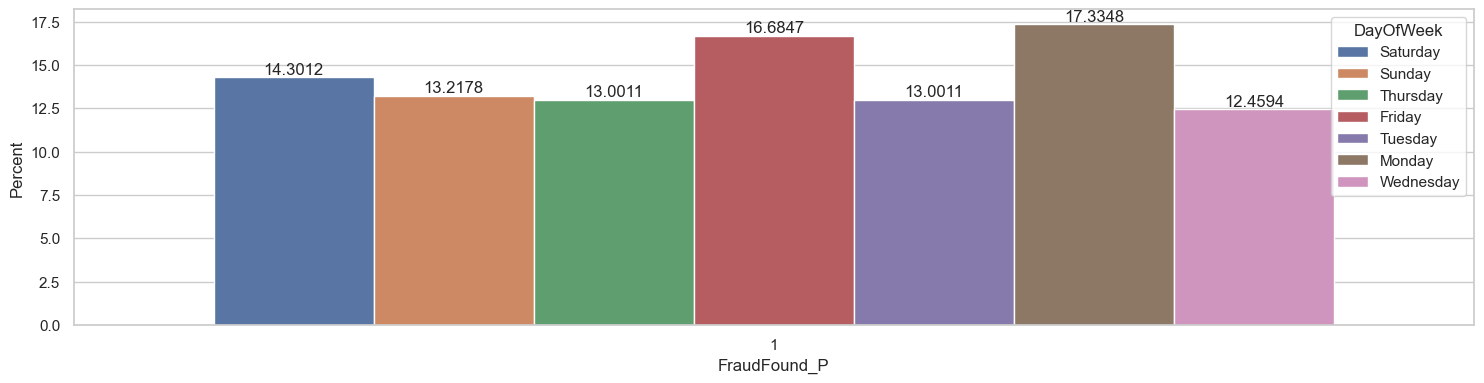

In [94]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=fraud,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',
              estimator=lambda x: len(x) / len(fraud) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

% of fraudulent transacitons is higher on Monday and Friday. 
maybe its due to hurry to go to work on Monday or coming back Friday Evening. But we do not have any time data

#### 6. Vehicle category and impact of sex on fraudulent activites

Sex     VehicleCategory
Female  Sedan              0.066387
        Sport              0.010121
        Utility            0.000000
Male    Sedan              0.084951
        Sport              0.016934
        Utility            0.112821
Name: FraudFound_P, dtype: float64
Sex     VehicleCategory
Female  Sedan              0.249045
        Sport              0.100146
        Utility                 NaN
Male    Sedan              0.278826
        Sport              0.129038
        Utility            0.316780
Name: FraudFound_P, dtype: float64


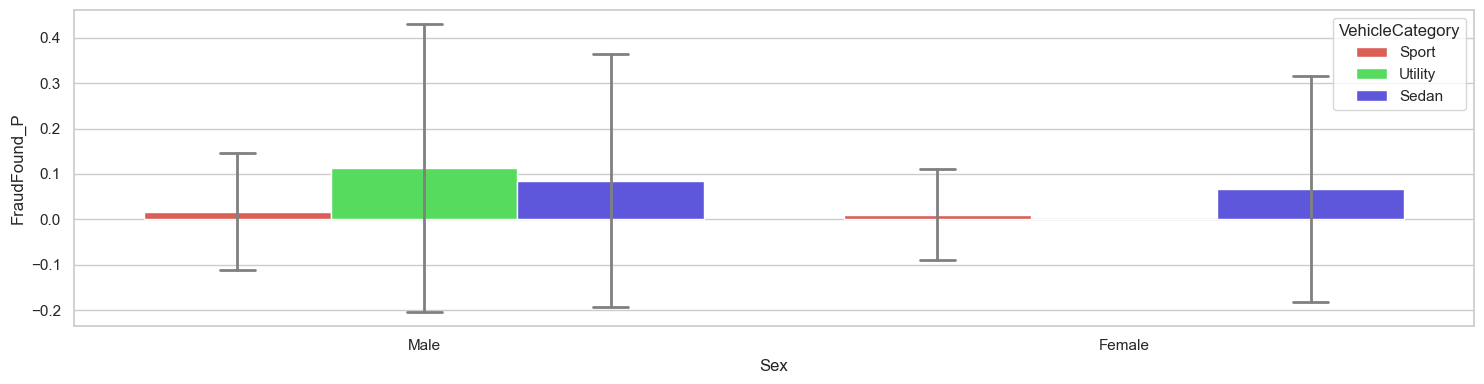

In [95]:
# Vehicle category and impact of sex on all claims 
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = data,
            palette = 'hls',
            order = ['Male', 'Female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(data.groupby(['Sex', 'VehicleCategory']).mean()['FraudFound_P'])
print(data.groupby(['Sex', 'VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

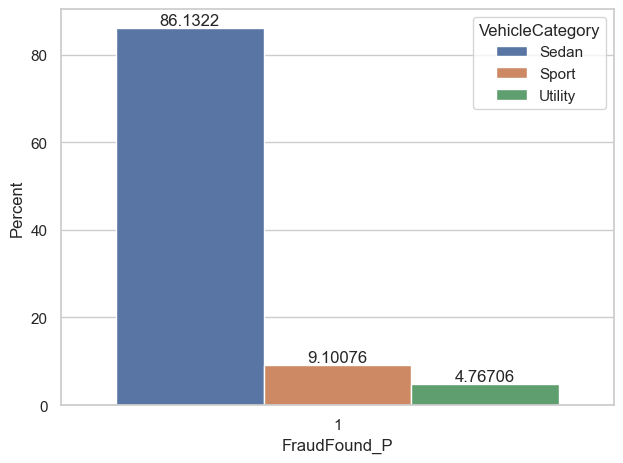

In [96]:
# vehicle category impact on fruadulent claims
sns.set(style="whitegrid") 
ax=sns.barplot(data=fraud,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(fraud) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

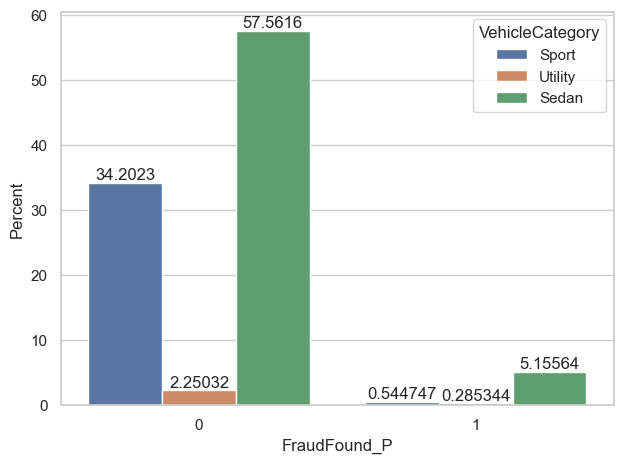

VehicleCategory
Sedan      0.082205
Sport      0.015677
Utility    0.112532
Name: FraudFound_P, dtype: float64
VehicleCategory
Sedan      0.274690
Sport      0.124236
Utility    0.316425
Name: FraudFound_P, dtype: float64


<Figure size 640x480 with 0 Axes>

In [97]:
#vechicle category impact on all claims
sns.set(style="whitegrid") 
ax=sns.barplot(data=data,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(data) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()


print(data.groupby(['VehicleCategory']).mean()['FraudFound_P'])
print(data.groupby(['VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

Sex
Female    0.043388
Male      0.062923
Name: FraudFound_P, dtype: float64
Sex
Female    0.203772
Male      0.242834
Name: FraudFound_P, dtype: float64


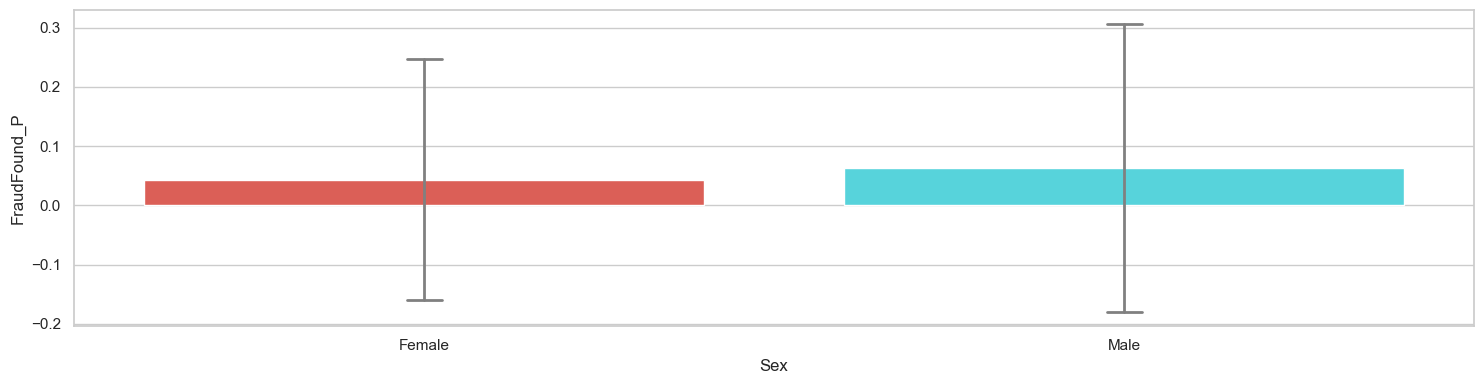

In [98]:
#impact of gender on all claims
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P',  data = data,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(data.groupby(['Sex']).mean()['FraudFound_P'])
print(data.groupby(['Sex']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

1.Males driving sedan vehicles have higher probablity of fraud

2.Overall, Utility vehicles have higher probablity of fraudulent transactions disproportionately.


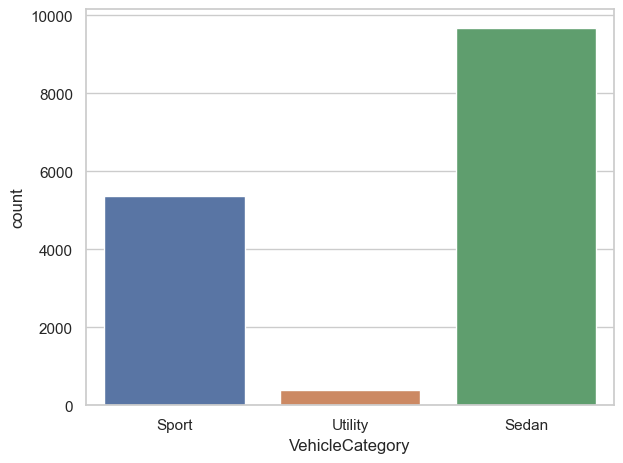

In [99]:
# PERCENTAGE BAR PLOT OF VEHICLE CATEGORY

ax = sns.countplot(x='VehicleCategory', data=data)
plt.tight_layout()
plt.show()



utility vehicles are less likely to be involved in fraud.
Most of the claims are coming from sedans. But they are driven the most also.

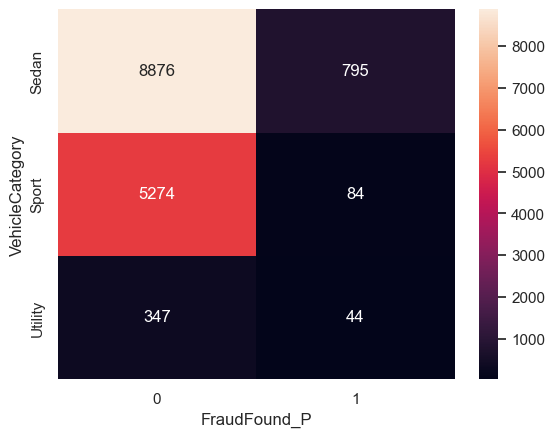

In [100]:
# Group the dataset by VehicleCategory and FraudFound_P 
group = data.groupby(['VehicleCategory', 'FraudFound_P'])
data_heat = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(data_heat, annot = True, fmt ="d")
plt.show()

Above correlation matix also indicates sedan vehicles have higher expectation of being involved in fraudulent activities

# Topics/ Assumptions to analyize ( what does an vehicle insurance company care)

# Assumption one
Your age, gender and marital status: Statistics show young drivers (with less experience behind the wheel) and male drivers are more likely to have an accident. Married drivers, on the other hand, are less likely to file an accident claim.

In [101]:
# To show number of accidents by age of each policy holder
data.groupby("AgeOfPolicyHolder")["FraudFound_P"].count()

AgeOfPolicyHolder
16 to 17     320
18 to 20      15
21 to 25     108
26 to 30     613
31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
over 65      508
Name: FraudFound_P, dtype: int64

In [102]:
#Filter only data that are not fraud (FraudFound_P that are not 1), 
#since these are the actual insurance claimed that the insurance company cares

non_fraud= data.loc[data['FraudFound_P'] == 0]
table=non_fraud.groupby(["AgeOfPolicyHolder"]).agg({"AgeOfPolicyHolder":"count"})
#Add a new column "Counts" to show the number of accidents per each age group
table.columns = ["Counts"]
table.reset_index(inplace=True)
table

,AgeOfPolicyHolder,Counts
0,16 to 17,289
1,18 to 20,13
2,21 to 25,92
3,26 to 30,580
4,31 to 35,5233
5,36 to 40,3806
6,41 to 50,2684
7,51 to 65,1322
8,over 65,478


In [103]:
# Display number of accidents for each age group of policy holders using bar chart in Altair package (sorting in descending order) 
alt.Chart(table).mark_bar().encode(
   x='Counts:Q',
  y=alt.Y('AgeOfPolicyHolder:N', sort='-x'),
  color='AgeOfPolicyHolder'
).properties(width=800, height=100,title='No. of accidents per age group')

# According to the chart, we can indicate that our intial assumptions about young drivers are more likely to have an accident, is not accurate
# The highest number of accidents are by 31 to 35 and 36 to 40 (which are the middle age groups)
# instead, the young age groups (16-17, 21-25,18-20) are showing lowest number of accidents

alt.Chart(...)

In [104]:
table1=non_fraud.groupby(["Sex"]).agg({"Sex":"count"})
#Add a new column "Counts" to show the number of accidents per each age group
table1.columns = ["Counts"]
table1.reset_index(inplace=True)
table1

,Sex,Counts
0,Female,2315
1,Male,12182


In [105]:


alt.Chart(table1).mark_bar().encode(y="Sex", x='Counts',color='Sex').properties(width=800, height=100,
                                                    title='Number of accidents by gender ')

alt.Chart(...)

In [106]:
# Gender and marital status of the accident victims (consider with all years)
df_sex_maritalstatus =  non_fraud.groupby(["Sex", "MaritalStatus"]).agg({"Sex":"count"})
df_sex_maritalstatus.columns = ["Counts"]
df_sex_maritalstatus.reset_index(inplace=True)
print(df_sex_maritalstatus.head(10))
alt.Chart(df_sex_maritalstatus).mark_bar().encode(y="Sex", x='Counts',color='MaritalStatus',
                                                  tooltip=['MaritalStatus','Counts']).properties(width=800, height=100,
                                                    title='Gender and marital status of the accident victims')

# What we are showing in the chart support our assumption that male drivers are more likely to have an accident; 
# Moreover, there is a huge difference of number of accidents between male drivers who are married and those who are single ; 
# while the difference in number of accidents between female drivers who are married or single, is relatively moderate

#  We can also conclude that Married drivers are more likely to file an accident claim in this analysis


# Include two seperate pie charts to show percentage of each Matital status for Female and male seperately..

      Sex MaritalStatus  Counts
0  Female      Divorced      39
1  Female       Married    1261
2  Female        Single     993
3  Female         Widow      22
4    Male      Divorced      34
5    Male       Married    8725
6    Male        Single    3413
7    Male         Widow      10


alt.Chart(...)

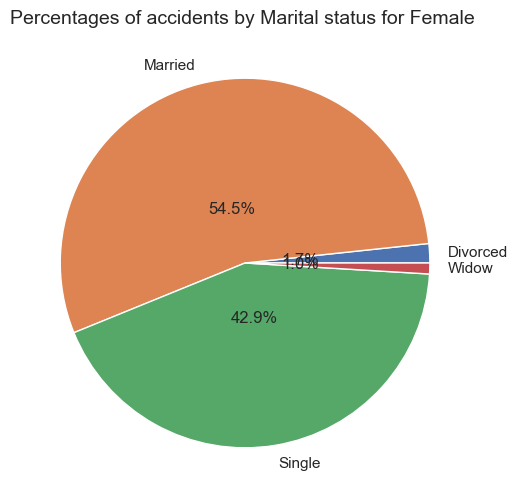

In [107]:
Female= non_fraud.loc[(non_fraud["Sex"]=='Female')]
table12=Female.groupby("MaritalStatus")["FraudFound_P"].count()
table12


#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = table12.keys()
plt.pie(x=table12, autopct="%.1f%%",labels=labels, pctdistance=0.3)
plt.title("Percentages of accidents by Marital status for Female ", fontsize=14);
pie.savefig("Percentages of accidents by Marital status for Female.png")


#table11.plot.pie(autopct="%.1f%%")

 the difference in the number of accidents between female drivers who are married or single, is relatively moderate


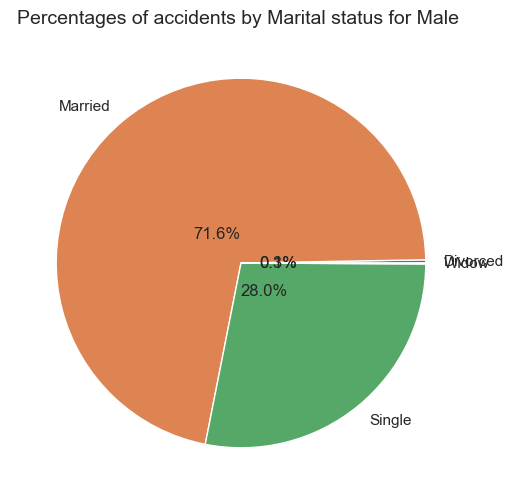

In [108]:
Male= non_fraud.loc[(non_fraud["Sex"]=='Male')]
table13=Male.groupby("MaritalStatus")["FraudFound_P"].count()
table13


#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = table13.keys()
plt.pie(x=table13, autopct="%.1f%%",labels=labels, pctdistance=0.2)
plt.title("Percentages of accidents by Marital status for Male ", fontsize=14);
pie.savefig("Percentages of accidents by Marital status for Male.png")

There is a huge difference of the number of accidents between male drivers who are married (71.62%) and those who are not (28.38%)


# Assumption Two
Where you live: Someone who lives in an urban area is most likely considered a bigger risk than a policyholder in a rural area with less traffic and fewer car thefts and break-ins.

In [109]:
# accident by Accident area 

table2=non_fraud.groupby(["AccidentArea"]).agg({"AccidentArea":"count"})
#Add a new column "Counts" to show the number of accidents per each age group
table2.columns = ["Counts"]
table2.reset_index(inplace=True)
table2

,AccidentArea,Counts
0,Rural,1465
1,Urban,13032


In [110]:
# Plotting the bar chart using Altair package
alt.Chart(non_fraud).mark_bar().encode(
    x='count(AccidentArea):Q',
    y=alt.Y('AccidentArea:N', sort='-x'),
    color='AccidentArea'
).properties(width=600, height=150,title='Count of accidents by Accident area in')

#

alt.Chart(...)

In [111]:
# accident by Accident area and Vehicle Category

table3=non_fraud.groupby(["AccidentArea","VehicleCategory"]).agg({"AccidentArea":"count"})
#Add a new column "Counts" to show the number of accidents per each Accident area and Vehicle Category
table3.columns = ["Counts"]
table3.reset_index(inplace=True)
table3

,AccidentArea,VehicleCategory,Counts
0,Rural,Sedan,1012
1,Rural,Sport,404
2,Rural,Utility,49
3,Urban,Sedan,7864
4,Urban,Sport,4870
5,Urban,Utility,298


In [112]:
#vechle category involved in the accident by Accident area 
alt.Chart(non_fraud).mark_bar().encode(
    x='count(VehicleCategory):Q',
    y=alt.Y('AccidentArea:N', sort='-x'),
    color='VehicleCategory'
).properties(width=800, height=100,title='vehicle category involved in the accident by Accident area')



#From the graphs, it is clear that most of the  accidents occur in Urban areas 
#as they are highly populated with more traffic issues and crime rates
#Sedan has the highest number of accidents in both urban and rural areas


alt.Chart(...)

In [113]:
#filtering the data for urban as the accident area
non_fraud_urban1=non_fraud.loc[(non_fraud["AccidentArea"]=='Urban')]
non_fraud_urban1
table5=non_fraud_urban1.groupby(["AccidentArea","VehicleCategory"]).agg({"AccidentArea":"count"})
#Add a new column "Counts" to show the number of accidents in urban for different Vehicle Category
table5.columns = ["Counts"]
table5.reset_index(inplace=True)
table5
# displaying the groupby using chart
pie = alt.Chart(table5).mark_arc(innerRadius=75).encode(
theta=alt.Theta(field="Counts", type="quantitative",stack=True),
color=alt.Color(field="VehicleCategory",type="nominal"),
).properties(title="Urban")

pie + pie.mark_text(radius=170, fontSize=10).encode(text='Counts')




alt.LayerChart(...)

In [114]:

non_fraud_rural1=non_fraud.loc[(non_fraud["AccidentArea"]=='Rural')]
non_fraud_rural1
table7=non_fraud_rural1.groupby(["AccidentArea","VehicleCategory"]).agg({"AccidentArea":"count"})
#Add a new column "Counts" to show the number of accidents in urban for different Vehicle Category
table7.columns = ["Counts"]
table7.reset_index(inplace=True)
table7
pie = alt.Chart(table7).mark_arc(innerRadius=75).encode(
theta=alt.Theta(field="Counts", type="quantitative",stack=True),
color=alt.Color(field="VehicleCategory",type="nominal"),
).properties(title="Rural")

pie + pie.mark_text(radius=170, fontSize=10).encode(text='Counts')




alt.LayerChart(...)

Most of the claims are coming from sedans. But they are driven the most also.
sedan vehicles have a higher expectation of being involved in fraudulent activities
utility vehicles are less likely to be involved in fraud. 


# Assumption 3
missing police reports, no witnesses:When there is no witness and the accident is not reported, it is more likely to be an fraud

In [115]:
#Filter only data that are fraud (FraudFound_P = 1), 
fraud= data.loc[data['FraudFound_P'] == 1]

In [116]:
table11=fraud.groupby(["WitnessPresent","PoliceReportFiled","FraudFound_P"]).agg({"PoliceReportFiled":"count"})
#Add a new column "Counts" to show the number of accidents coresponding to witnesspresent and policereportfiled for fraud data
table11.columns = ["Counts"]
table11.reset_index(inplace=True)
table11


,WitnessPresent,PoliceReportFiled,FraudFound_P,Counts
0,No,No,1,905
1,No,Yes,1,15
2,Yes,No,1,2
3,Yes,Yes,1,1


From the chart, it is clear that the number of fraud is higher when there is no witness and no report is filed.
When there is a witness or police report is filed, the number of fraud is reduced.


# assumption 4
analysing fraud based on past number of claims

In [117]:
table12=fraud.groupby(["PastNumberOfClaims","FraudFound_P"]).agg({"PastNumberOfClaims":"count"})
#Add a new column "Counts" to show the number of accidents with PastNumberOfClaims
table12.columns = ["Counts"]
table12.reset_index(inplace=True)
table12


,PastNumberOfClaims,FraudFound_P,Counts
0,1,1,222
1,2 to 4,1,294
2,more than 4,1,68
3,none,1,339


When the past number of claims is between 2-4, the fraud found is 294 but when the past number of claims is more than 4 it is reduced to 68 and the assumption is not entirely accurate in this case.


# Assumption 5
A more expensive vehicle doesn’t always cost more to insure

In [118]:
Veh_MakePrice_Deductible = data.groupby(["Make","VehiclePrice"]).agg({"Deductible":"mean"}).sort_values(by=['Deductible'], ascending=False)
Veh_MakePrice_Deductible
## We can observe from the table below that the price and make of the vehicle doesn't affect the deductible.

Deductible
Make    VehiclePrice               
Saab    40000 to 59000   480.000000
        20000 to 29000   454.545455
Mecedes more than 69000  450.000000
Nisson  more than 69000  423.076923
Ford    20000 to 29000   418.421053
...                             ...
Jaguar  30000 to 39000   400.000000
BMW     more than 69000  400.000000
Nisson  40000 to 59000   400.000000
Mercury 20000 to 29000   400.000000
BMW     40000 to 59000   400.000000

[79 rows x 1 columns]

In [119]:
#Now, We focus on the price and compare the price with the average deductible for each price range.
Veh_Price_Deductible = data.groupby(["VehiclePrice"]).agg({"Deductible":"mean"}).sort_values(by=['Deductible'], ascending=False)
Veh_Price_Deductible

,Deductible
VehiclePrice,
40000 to 59000,409.978308
30000 to 39000,409.000849
less than 20000,407.846715
20000 to 29000,407.377151
more than 69000,406.515712
60000 to 69000,401.149425


In [120]:
#Add a new column "Deductible" to show the number of accidents in urban for different Vehicle Make
Veh_Make_Deductible = data.groupby("Make").agg({"Deductible":"mean"}).sort_values(by=['Deductible'], ascending=False)
Veh_Make_Deductible
Veh_Make_Deductible.columns = ["Deductible"]
Veh_Make_Deductible.reset_index(inplace=True)
Veh_Make_Deductible

,Make,Deductible
0,Mecedes,425.000000
1,Saab,416.666667
2,Nisson,413.333333
3,VW,410.600707
4,Ford,408.888889
5,Toyota,408.779237
6,Pontiac,408.053167
7,Chevrolet,407.674004
8,Dodge,407.339450
9,Mazda,407.179269


In [121]:
Veh_Price_Deductible.columns = ["Deductible"]
Veh_Price_Deductible.reset_index(inplace=True)
Veh_Price_Deductible

,VehiclePrice,Deductible
0,40000 to 59000,409.978308
1,30000 to 39000,409.000849
2,less than 20000,407.846715
3,20000 to 29000,407.377151
4,more than 69000,406.515712
5,60000 to 69000,401.149425


In [122]:
## Create a donut chart to view the data by make vs deductibles

pie = alt.Chart(Veh_Make_Deductible).mark_arc(innerRadius=75).encode(
theta=alt.Theta(field="Deductible", type="quantitative",stack=True),
color=alt.Color(field="Make",type="nominal"),
).properties(title="Deductible")

pie + pie.mark_text(radius=170, fontSize=10).encode(text='Deductible')

## Again, we can see that the deductible remains similar across different makes

alt.LayerChart(...)

In [123]:
pie = alt.Chart(Veh_Price_Deductible).mark_arc(innerRadius=75).encode(
theta=alt.Theta(field="Deductible", type="quantitative",stack=True),
color=alt.Color(field="VehiclePrice",type="nominal"),
).properties(title="Deductible")

pie + pie.mark_text(radius=170, fontSize=10).encode(text='Deductible')

## Here We can infer that the average deductible remains almost the same regardless of the price of the vehicle no matter the brand. 

alt.LayerChart(...)

On observing the three tables, we can see that the average deductibles remain similar no matter the make/price of the vehicle, although as seen in the third table, the deductible decreases slightly with a decrease in the price of the vehicle.

On observing the donut charts, we can see that the average deductibles remain similar no matter the make/price of the vehicle at an average of about $400-$408 per vehicle price as mentioned in the table in the previous slide.
We can conclude that the deductible is not dependent upon the price/make of the vehicle.


# Step 3: Classification
our response variable is a binary indicator FraudFound_P with two possibilities 0 means fraud was not found and 1 means fraud was found.

Determining the correlation between variables using the corr() function  
so we create a list of all the variables of the dataset and 
corr() function returns the pairwise correlation of all columns in the dataframe

In [124]:
attributes=['Month','WeekOfMonth','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed',
            'Sex','MaritalStatus','Age','Fault','PolicyType','VehicleCategory','VehiclePrice','Deductible','DriverRating',
            'Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder',
            'PoliceReportFiled','WitnessPresent','AgentType','AddressChange_Claim','NumberOfCars',
            'Year','BasePolicy']
data.corr()



,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,0.017348,0.007266,-0.024760
Deductible,-0.003993,0.005457,0.069420,0.017348,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,-0.001170,-0.013890,1.000000


<AxesSubplot:>

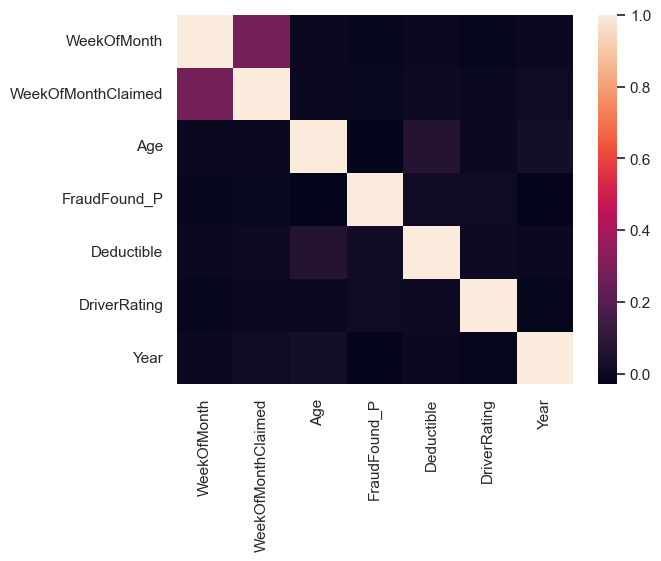

In [125]:
sns.heatmap(data.corr())# correlation matrix using seaborn

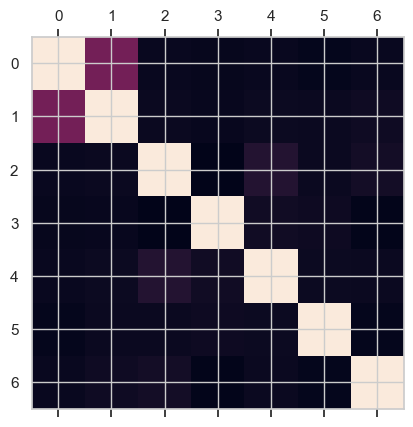

In [126]:
plt.matshow(data.corr())
plt.show()

In [127]:
#we  create a function to find ONLY a variable's correlation with the FraudFound_P variable. 
#for that, we  need to transform all the strings to integers.
#transforming string to integer data
def transform(column):
    label=LabelEncoder().fit_transform(data[column])
    data.drop(column,axis=1,inplace=True)
    data[column]=label
def multi_transform(list):
    mt_list=[]
    for x in list:
        if x not in mt_list:
            transform(x)
multi_transform(attributes)

#calculating the correlation between each variable and fraud
def multi_corr(column):
    corr_list=[]
    for x in column:
        if x not in corr_list:
            c=data['FraudFound_P'].corr(data[x],method='pearson',min_periods=1)
            print(x)
            print(round(c,2))
print('Correlation scores by variable:')
multi_corr(attributes)

Correlation scores by variable:
Month
-0.01
WeekOfMonth
-0.01
DayOfWeek
-0.02
Make
-0.02
AccidentArea
-0.03
DayOfWeekClaimed
-0.0
MonthClaimed
-0.01
WeekOfMonthClaimed
-0.01
Sex
0.03
MaritalStatus
0.0
Age
-0.03
Fault
-0.13
PolicyType
-0.06
VehicleCategory
-0.1
VehiclePrice
0.06
Deductible
0.03
DriverRating
0.01
Days_Policy_Accident
0.01
Days_Policy_Claim
-0.02
PastNumberOfClaims
0.02
AgeOfVehicle
-0.02
AgeOfPolicyHolder
-0.03
PoliceReportFiled
-0.02
WitnessPresent
-0.01
AgentType
-0.02
AddressChange_Claim
-0.04
NumberOfCars
0.01
Year
-0.02
BasePolicy
-0.16


Here, we can see  which of the variables are most highly correlated with fraud, and which are the least correlated.

highly correlated variables=BasePolicy, VehicleCategory, Fault, VehiclePrice, PolicyType

least correlated variables=DayOfWeekClaimed, maritalStatus, Month, WeekOfMonth, MonthClaimed, WeekOfMonthClaimed,
                           VehicleCategory, DriverRating, Days_Policy_Accident, WitnessPresent, NumberOfSuppliments,
                           NumberOfCars.

# Logistic Regression

Logistic regression is a type of statistical model that is used for classification tasks. 
It is a supervised learning algorithm that takes input data and uses a linear combination of the input features to predict a binary outcome (0 or 1)
 The logistic function takes input values and maps them to an output value between 0 and 1.
if the predicted probability is greater than 0.5, we predict the positive class, and if it is less than 0.5, we predict the negative class.
Logistic regression can be used for a variety of classification tasks, including binary classification and multi-class classification


In [128]:
#splitting the data into training and test data
y=data.FraudFound_P # binary dependent variable
X=data[attributes]# independent variables

#train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [129]:
# Train the model on the training set
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logistic_regression.predict(X_test)



# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)



Accuracy: 0.940337224383917
[[4350    0]
 [ 276    0]]


C:\Users\akhil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier on test set: 0.940337224383917

confusion matrix for the model
[[4350    0]
[ 276    0]]

The result is telling us that we have 4350 correct predictions and 276 incorrect predictions.

In [130]:
# Convert the DataFrame to a NumPy array
#X_train_array = X_train.values
#y_train_array=y_train.values

# Provide filler values for the extra dimensions of the data
#filler_values = np.full((X_train_array.shape[0], [1,2]), 0.5)
#X_train_filler = np.hstack([X_train_array, filler_values])

# Plot the decision boundary of the model
#plot_decision_regions(X_train_filler, y_train_array, logistic_regression)

# Plot the decision boundary of the model
#plot_decision_regions(X_train_array, y_train_array, logistic_regression)

In [131]:
model = sm.Logit(y_test, X_test).fit()
print(model.summary())
#print(model.summary2())


         Current function value: 0.183168
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           FraudFound_P   No. Observations:                 4626
Model:                          Logit   Df Residuals:                     4597
Method:                           MLE   Df Model:                           28
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.1897
Time:                        10:18:22   Log-Likelihood:                -847.33
converged:                      False   LL-Null:                       -1045.7
Covariance Type:            nonrobust   LLR p-value:                 9.355e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Month                   -0.0457      0.026     -1.772      0.076      -0.096       0.005
WeekOfMonth             -0.0403    

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [132]:
# creating the model with highly corelated variables
cols=['BasePolicy', 'VehicleCategory', 'Fault', 'VehiclePrice', 'PolicyType'] 
X=data[cols]
y=data.FraudFound_P
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.225145
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006     
Dependent Variable: FraudFound_P     AIC:              6953.4583 
Date:               2022-12-12 10:18 BIC:              6991.6754 
No. Observations:   15420            Log-Likelihood:   -3471.7   
Df Model:           4                LL-Null:          -3493.8   
Df Residuals:       15415            LLR p-value:      6.0935e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
BasePolicy       -2.1427   0.0633 -33.8474 0.0000 -2.2667 -2.0186
VehicleCategory  -0.6868   0.1961  -3.5014 0.0005 -1.0712 -0.3023


when we consider the highly corelatyed variables, accuracy improved and the p-values for all variables are smaller than 0.05

In [141]:
#Compute precision, recall, F-measure and support

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4350
           1       0.00      0.00      0.00       276

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626



C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


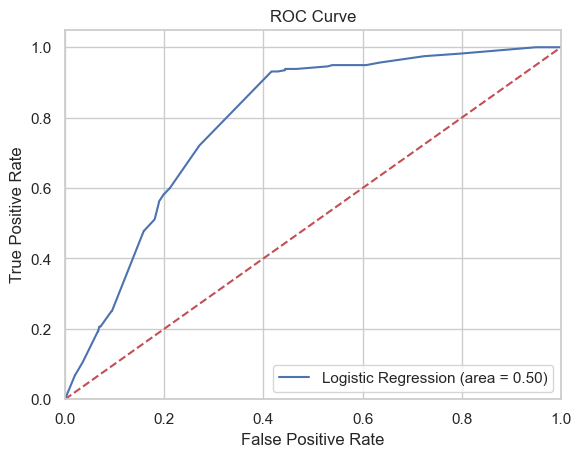

In [144]:
#ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).